In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import *

In [2]:
sc = pyspark.SparkContext(appName="Bank Marketing")
spark = SparkSession(sc)

24/06/22 18:33:20 WARN Utils: Your hostname, dsbda-vm resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/06/22 18:33:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/22 18:33:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
bank_df = spark.read.csv("bank-additional-balanced.csv", inferSchema = True, header = True)

In [4]:
bank_df.head()

Row(age=48, job='technician', marital='married', education='professional.course', default='yes', housing='no', loan='no', contact='cellular', month='aug', day_of_week='tue', duration=66, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp_var_rate=1.4, cons_price_idx=93.444, cons_conf_idx=-36.1, euribor3m=4.963, nr_employed=5228.1, y='no')

In [5]:
bank_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



Demographics:
 - age: Customer's age (numeric)
 - job: Type of job (categorical: 'admin.', 'services', …)
 - marital: Marital status (categorical: 'married', 'single', …)
 - education: Level of education (categorical: 'basic.4y', 'high.school', …)

Past customer events:
 - default: Has credit in default? (categorical: 'no', 'unknown', …)
 - housing: Has housing loan? (categorical: 'no', 'yes', …)
 - loan: Has personal loan? (categorical: 'no', 'yes', …)

Past direct marketing contacts:
 - contact: Contact communication type (categorical: 'cellular', 'telephone', …)
 - month: Last contact month of year (categorical: 'may', 'nov', …)
 - dayofweek: Last contact day of the week (categorical: 'mon', 'fri', …)
 - duration: Last contact duration, in seconds (numeric). Important note: If duration = 0 then y = 'no'.

Campaign information:
 - campaign: Number of contacts performed during this campaign and for this client (numeric, includes the last contact)
 - pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric)
 - previous: Number of contacts performed before this campaign and for this client (numeric)
 - poutcome: Outcome of the previous marketing campaign (categorical: 'nonexistent', 'success', …)

Socioeconomic factors:
 - emp.var.rate: Employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: Consumer price index - monthly indicator (numeric)
 - cons.conf.idx: Consumer confidence index - monthly indicator (numeric)
 - euribor3m: Euribor 3 month rate - daily indicator (numeric)
 - nr.employed: Number of employees - quarterly indicator (numeric)

In [6]:
bank_df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [7]:
bank_df.show(5)

+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job|marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 48| technician|married|professional.course|    yes|     no|  no| cellular|  aug|        tue|      66|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1| no|
| 42|     admin.|married|        high.school|     no|     no|  no| cellular|  nov|        mon|     651|       2|  999|       1|    failure|        -0.1|          93.2| 

In [8]:
bank_df.describe('job').show()

+-------+-------+
|summary|    job|
+-------+-------+
|  count|   4118|
|   mean|   null|
| stddev|   null|
|    min| admin.|
|    max|unknown|
+-------+-------+



In [9]:
bank_df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4118|
|   mean| 40.35016998542982|
| stddev|11.965510460619482|
|    min|                17|
|    max|                98|
+-------+------------------+



In [10]:
bank_df.describe('previous').show()

+-------+------------------+
|summary|          previous|
+-------+------------------+
|  count|              4118|
|   mean|0.3166585721223895|
| stddev|0.6985667032576548|
|    min|                 0|
|    max|                 6|
+-------+------------------+



In [11]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for column in categorical_columns:
    bank_df.groupBy(column).count().show()

+-------------+-----+
|          job|count|
+-------------+-----+
|   management|  292|
|      retired|  268|
|      unknown|   32|
|self-employed|  129|
|      student|  152|
|  blue-collar|  770|
| entrepreneur|  145|
|       admin.| 1118|
|   technician|  624|
|     services|  378|
|    housemaid|   96|
|   unemployed|  114|
+-------------+-----+

+--------+-----+
| marital|count|
+--------+-----+
| unknown|   12|
|divorced|  427|
| married| 2409|
|  single| 1270|
+--------+-----+

+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school|  960|
|            unknown|  199|
|           basic.6y|  194|
|professional.course|  500|
|  university.degree| 1328|
|         illiterate|    1|
|           basic.4y|  404|
|           basic.9y|  532|
+-------------------+-----+

+-------+-----+
|default|count|
+-------+-----+
|unknown|  684|
|     no| 3433|
|    yes|    1|
+-------+-----+

+-------+-----+
|housing|count|
+-------+-----+
|unknown|   

In [12]:
bank_df.select('job','education').show()
bank_df.select('job','education').distinct().show()

+-------------+-------------------+
|          job|          education|
+-------------+-------------------+
|   technician|professional.course|
|       admin.|        high.school|
|       admin.|           basic.4y|
|  blue-collar|           basic.9y|
|      retired|professional.course|
|       admin.|  university.degree|
|   management|  university.degree|
|  blue-collar|        high.school|
|  blue-collar|           basic.4y|
|     services|        high.school|
|   management|  university.degree|
|   technician|        high.school|
|       admin.|        high.school|
|   technician|  university.degree|
|       admin.|  university.degree|
|   technician|  university.degree|
|       admin.|  university.degree|
| entrepreneur|  university.degree|
|       admin.|           basic.9y|
|self-employed|  university.degree|
+-------------+-------------------+
only showing top 20 rows

+-------------+-------------------+
|          job|          education|
+-------------+-------------------+
| 

In [13]:
bank_df.filter(bank_df.job=='retired').count()
#We can do also boolean conditions
bank_df.filter((bank_df.job=='retired')&(bank_df.marital=='single')).show()

+---+-------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|    job|marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 57|retired| single|           basic.4y|     no|    yes|  no|telephone|  jun|        thu|     107|       1|  999|       0|nonexistent|         1.4|        94.465|        -41.8|    4.961|     5228.1| no|
| 65|retired| single|  university.degree|     no|     no|  no| cellular|  nov|        thu|     253|       1|  999|       2|    failure|        -3.4|        92.649|        -30.1|    0.7

In [14]:
bank_df.orderBy(bank_df.emp_var_rate.desc()).show()

+---+-----------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|   loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 48| technician| married|  university.degree|     no|     no|     no| cellular|  aug|        fri|     232|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.964|     5228.1| no|
| 37| technician| married|professional.course|     no|     no|     no| cellular|  jul|        thu|      37|       8|  999|       0|nonexistent|         

In [15]:
row_count = bank_df.count()
job_df = bank_df.groupby("job","education","y")
job_df.count().orderBy(bank_df.job.asc(),bank_df.education.asc()).show() #row_count,truncate = False

+-----------+-------------------+---+-----+
|        job|          education|  y|count|
+-----------+-------------------+---+-----+
|     admin.|           basic.4y| no|    4|
|     admin.|           basic.4y|yes|    5|
|     admin.|           basic.6y| no|    8|
|     admin.|           basic.9y| no|   21|
|     admin.|           basic.9y|yes|   20|
|     admin.|        high.school|yes|  160|
|     admin.|        high.school| no|  178|
|     admin.|professional.course| no|   18|
|     admin.|professional.course|yes|   17|
|     admin.|  university.degree| no|  292|
|     admin.|  university.degree|yes|  371|
|     admin.|            unknown| no|   10|
|     admin.|            unknown|yes|   14|
|blue-collar|           basic.4y|yes|   58|
|blue-collar|           basic.4y| no|  125|
|blue-collar|           basic.6y|yes|   38|
|blue-collar|           basic.6y| no|   73|
|blue-collar|           basic.9y|yes|  114|
|blue-collar|           basic.9y| no|  174|
|blue-collar|        high.school

In [16]:
dur_df = bank_df.groupBy("duration","y")
dur_df.count().orderBy(bank_df.duration.asc()).show()

+--------+---+-----+
|duration|  y|count|
+--------+---+-----+
|       4| no|    2|
|       5| no|    1|
|       6| no|    1|
|       7| no|    3|
|       8| no|    3|
|       9| no|    3|
|      10| no|    6|
|      11| no|    3|
|      12| no|    3|
|      13| no|    6|
|      14| no|    4|
|      15| no|    3|
|      16| no|    3|
|      17| no|    3|
|      18| no|    4|
|      19| no|    3|
|      20| no|    7|
|      21| no|    4|
|      22| no|    5|
|      23| no|    3|
+--------+---+-----+
only showing top 20 rows



In [17]:
row_count = bank_df.count()
pout_df = bank_df.groupBy("poutcome","y")
pout_df.count().orderBy(bank_df.poutcome.asc()).show()

+-----------+---+-----+
|   poutcome|  y|count|
+-----------+---+-----+
|    failure|yes|  270|
|    failure| no|  218|
|nonexistent|yes| 1390|
|nonexistent| no| 1811|
|    success| no|   30|
|    success|yes|  399|
+-----------+---+-----+



In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional-balanced.csv', delimiter=',')

In [19]:
prv_df = bank_df.groupBy("previous","y")
prv_df.count().orderBy(bank_df.previous.asc()).show()

+--------+---+-----+
|previous|  y|count|
+--------+---+-----+
|       0|yes| 1390|
|       0| no| 1811|
|       1|yes|  431|
|       1| no|  224|
|       2| no|   18|
|       2|yes|  155|
|       3| no|    4|
|       3|yes|   59|
|       4| no|    1|
|       4|yes|   16|
|       5|yes|    8|
|       6| no|    1|
+--------+---+-----+



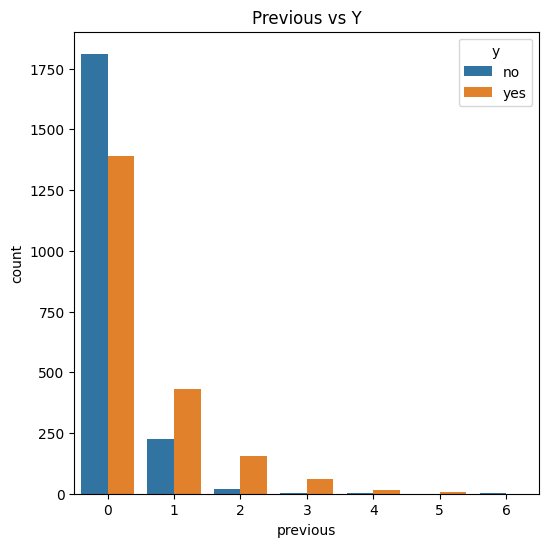

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# filtered_data = data[data['poutcome'] == 'success']
# plt.figure(figsize=(6, 6))
# sns.countplot(data=filtered_data, x='poutcome', hue='y')
# plt.title('Poutcome vs Y')
# plt.show()

# filtered_data = data[data['pdays'] == 999]
# plt.figure(figsize=(6, 6))
# sns.countplot(data=filtered_data, x='pdays', hue='y')
# plt.title('Pdays vs Y')
# plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(data, x='previous', hue='y')
plt.title('Previous vs Y')
plt.show()

------------------------------------------------------------------------------------

Data Cleaning

In [21]:
# changing yes/no to 1/0
from pyspark.sql.functions import when

bank_df = bank_df.withColumn("y", when(bank_df.y == "yes", 1).when(bank_df.y == "no", 0))

In [22]:
bank_df.show(5)

+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job|marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 48| technician|married|professional.course|    yes|     no|  no| cellular|  aug|        tue|      66|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 42|     admin.|married|        high.school|     no|     no|  no| cellular|  nov|        mon|     651|       2|  999|       1|    failure|        -0.1|          93.2| 

In [23]:
#checking which columns contain "unknown" value to change them
from pyspark.sql.functions import col

def find_unknown_columns(df):
    unknown_columns = []
    for column in df.columns:
        if df.filter(col(column) == "unknown").count() > 0:
            unknown_columns.append(column)
    return unknown_columns

# Find columns with "unknown"
unknown_columns = find_unknown_columns(bank_df)

print("Columns containing 'unknown':", unknown_columns)

Columns containing 'unknown': ['job', 'marital', 'education', 'default', 'housing', 'loan']


In [24]:
# job: unknown -> other
bank_df = bank_df.withColumn("job", when(col("job") == "unknown", "other").otherwise(col("job")))

# education: unknown -> none
bank_df = bank_df.withColumn("education", when(col("education") == "unknown", "none").otherwise(col("education")))

# marital: unknown -> single
bank_df = bank_df.withColumn("marital", when(col("marital") == "unknown", "single").otherwise(col("marital")))

# housing: unknown -> no
bank_df = bank_df.withColumn("housing", when(col("housing") == "unknown", "no").otherwise(col("housing")))

# loan: unknown -> no
bank_df = bank_df.withColumn("loan", when(col("loan") == "unknown", "no").otherwise(col("loan")))

In [25]:
# droping the column "default" because it has no meaning 
bank_df = bank_df.drop("default")

In [26]:
bank_df.columns

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [27]:
#cheacking if there are no unknows anymore
unknown_columns = find_unknown_columns(bank_df)
print("Columns containing 'unknown':", unknown_columns)

Columns containing 'unknown': []


Now we have our dataset ready to move to HDFS for mapReduce job

In [29]:
bank_df.write.save('hdfs://localhost:54310/finalDSBD/', format='csv', mode='append')

In [30]:
sc.stop()